<a href="https://colab.research.google.com/github/haakonhuynh/wine_type_classification_logreg_knn/blob/main/wine_classification_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍷 Classifying Wine Types with Machine Learning
This notebook trains classification models to predict whether a wine is red or white based on chemical features like pH, acidity, and alcohol.


#Initializing and importing datasets

In [ ]:
import pandas as pd

red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine\
-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/win\
e-quality/winequality-white.csv"

df_white = pd.read_csv(white_wine_url, sep=';')
df_red = pd.read_csv(red_wine_url, sep=';')


print("Red Wine Data:")
print(df_red.head(5))

print("\nWhite Wine Data:")
print(df_white.head(5))


Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    

#Combining the two datasets into one for analysis

In [ ]:
# Add the 'winetype' column: 0 for white wine, 1 for red wine
df_red["winetype"] = 1
df_white["winetype"] = 0

# Combine into one dataframe
df_combined = pd.concat([df_red, df_white], axis=0).reset_index(drop=True)

# Display first 3 and last 3 rows
print(df_combined.head(3))
print(df_combined.tail(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  winetype  
0      9.4        5         1  
1      9.8        5         1  
2      9.8        5         1  
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0

#Displaying histograms to understand distribution of three variables hypothesized to predict wine type

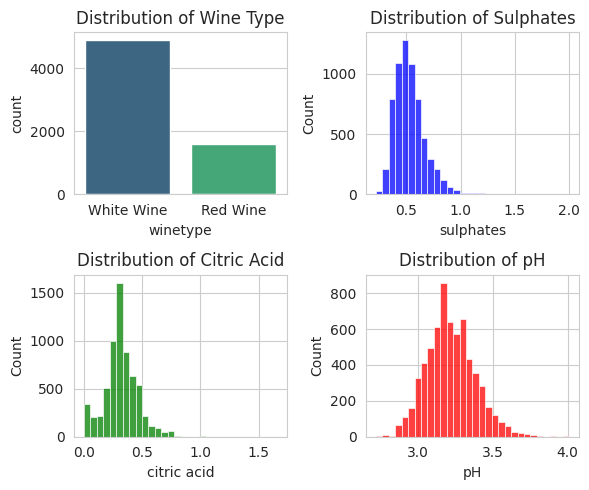

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(6,5))

# Histogram for winetype
plt.subplot(2, 2, 1)
sns.countplot(x="winetype", data=df_combined, hue="winetype", palette="viridis",
              legend=False)
plt.title("Distribution of Wine Type")
plt.xticks([0, 1], ["White Wine", "Red Wine"])

# Histogram for sulphates
plt.subplot(2, 2, 2)
sns.histplot(df_combined["sulphates"], bins=30, color="blue")
plt.title("Distribution of Sulphates")

# Histogram for citric acid
plt.subplot(2, 2, 3)
sns.histplot(df_combined["citric acid"], bins=30, color="green")
plt.title("Distribution of Citric Acid")

# Histogram for pH
plt.subplot(2, 2, 4)
sns.histplot(df_combined["pH"], bins=30, color="red")
plt.title("Distribution of pH")

plt.tight_layout()
plt.show()




#Conducting the classifiation task using logistic regression

In [ ]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = df_combined[['fixed acidity', 'volatile acidity', 'citric acid',
                 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                 'density',
                 'sulphates', 'alcohol', 'quality']]
y = df_combined['winetype']

# Split the dataset
X_train_wine, X_test_wine, y_train_wine, y_test_wine = \
train_test_split(X, y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)

# Fit Logistic Regression with more iterations
logreg = LogisticRegression(penalty=None, solver="lbfgs",
                            max_iter=500).fit(X_train_wine, y_train_wine)

# Print results
print("logreg.coef_:\n", logreg.coef_)
print("Training set score: {:.3f}"
.format(logreg.score(X_train_wine, y_train_wine)))
print("Test set score: {:.3f}"
.format(logreg.score(X_test_wine, y_test_wine)))

# Predictions
predicted_vals = logreg.predict(X_test_wine)
print("logreg.predict:\n", predicted_vals)

# cross-validation
logreg_cv_score_wine = np.mean(cross_val_score
 (logreg, X_train_wine, y_train_wine, cv=10, scoring='accuracy'))
print("Logistic Regression Cross-Validation Score: {:.3f}"
.format(logreg_cv_score_wine))


logreg.coef_:
 [[ 0.22972234  1.59238628 -0.29603292 -4.98569648  0.79303569  1.29153171
  -3.18526896  4.56074912  0.63827788  1.52464777  0.35192895]]
Training set score: 0.994
Test set score: 0.991
logreg.predict:
 [0 1 0 ... 0 0 0]
Logistic Regression Cross-Validation Score: 0.994


In [ ]:
#Penalized Logistic Regression
penlogreg = LogisticRegression(C=100, penalty='l2')\
.fit(X_train_wine, y_train_wine)

print("penlogreg .coef_: {}".format(penlogreg.coef_))

print("Training set score: {:.3f}".format(penlogreg.score\
 (X_train_wine, y_train_wine)))
print("Test set score: {:.3f}".format(penlogreg.score\
 (X_test_wine, y_test_wine)))

penlog_predicted_vals = penlogreg.predict(X_test_wine)
print("penlogreg.predict: {}".format(penlog_predicted_vals))

# cross-validation
penlogreg_cv_score_wine = np.mean(cross_val_score(logreg,\
X_train_wine, y_train_wine, cv=10, scoring='accuracy'))

print("Logistic Regression Cross-Validation Score: {:.3f}".format\
 (penlogreg_cv_score_wine))




penlogreg .coef_: [[ 0.23191208  1.59031509 -0.29640183 -4.96048884  0.79247026  1.28484035
  -3.1791436   4.54066976  0.6406676   1.5152504   0.35094705]]
Training set score: 0.994
Test set score: 0.991
penlogreg.predict: [0 1 0 ... 0 0 0]
Logistic Regression Cross-Validation Score: 0.994


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Scale the training data
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train_wine)
X_test_scaled_wine = scaler.transform(X_test_wine)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_wine, y_train_wine)

# Perform cross-validation on the training data
print("KNN Training set score: {:.3f}".format(knn.score\
 (X_train_scaled_wine, y_train_wine)))

print("KNN Test set score: {:.3f}".format(knn.score\
 (X_test_scaled_wine, y_test_wine)))

KNN_predicted_vals = knn.predict(X_test_scaled_wine)
# Cross-validation
knn_cv_score_wine = np.mean(cross_val_score\
 (knn, X_train_scaled_wine, y_train_wine, cv=10, scoring='accuracy'))
print("KNN.predict: {}".format(KNN_predicted_vals))
print("KNN Classification Cross-Validation Score: {:.3f}"\
      .format(knn_cv_score_wine))



KNN Training set score: 0.995
KNN Test set score: 0.991
KNN.predict: [0 1 0 ... 0 0 0]
KNN Classification Cross-Validation Score: 0.993


The three models classify with very similar accuracy around 99.1%. KNN scores very marginally worse and with lower cross validation scores.

#Investigating the effect of scaling data on each model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

X = df_combined[['fixed acidity', 'volatile acidity', 'citric acid',\
                 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',\
                 'density',
                 'sulphates', 'alcohol', 'quality']]
y = df_combined['winetype']

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split\
 (X, y, random_state=42)

### **1. Logistic Regression Without Scaling**
logreg_no_scaling = LogisticRegression(penalty=None, solver="lbfgs",\
                                       max_iter=500)
logreg_no_scaling.fit(X_train_wine, y_train_wine)

print("\n--- Logistic Regression WITHOUT Scaling ---")
print("Training set score (No Scaling): {:.3f}"\
      .format(logreg_no_scaling.score(X_train_wine, y_train_wine)))

print("Test set score (No Scaling): {:.3f}"\
      .format(logreg_no_scaling.score(X_test_wine, y_test_wine)))

logreg_cv_score_no_scaling = np.mean(cross_val_score\
 (logreg_no_scaling, X_train_wine, y_train_wine, cv=10, scoring='accuracy'))
print("Cross-Validation Score (No Scaling): {:.3f}"\
      .format(logreg_cv_score_no_scaling))

### **2. Logistic Regression With Scaling**
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train_wine)
X_test_scaled_wine = scaler.transform(X_test_wine)

logreg_scaled = LogisticRegression(penalty=None, solver="lbfgs", max_iter=500)
logreg_scaled.fit(X_train_scaled_wine, y_train_wine)

print("\n--- Logistic Regression WITH Scaling ---")

print("Training set score (With Scaling): {:.3f}".format\
 (logreg_scaled.score(X_train_scaled_wine, y_train_wine)))

print("Test set score (With Scaling): {:.3f}".format\
 (logreg_scaled.score(X_test_scaled_wine, y_test_wine)))

logreg_cv_score_scaled = np.mean(cross_val_score\
 (logreg_scaled, X_train_scaled_wine, y_train_wine, cv=10, scoring='accuracy'))

print("Cross-Validation Score (With Scaling): {:.3f}"\
      .format(logreg_cv_score_scaled))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression WITHOUT Scaling ---
Training set score (No Scaling): 0.986
Test set score (No Scaling): 0.979


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Score (No Scaling): 0.986

--- Logistic Regression WITH Scaling ---
Training set score (With Scaling): 0.994
Test set score (With Scaling): 0.991
Cross-Validation Score (With Scaling): 0.994


For Logistic Regression, without scaling the data, the algorithm does not fully converge before reaching the default iteration limit. This means that the loss function did not reach its minimum and we did not find the optimal coefficients.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define features (X) and target (y)
X = df_combined[['fixed acidity', 'volatile acidity', 'citric acid', \
                 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',\
                 'density',
                 'sulphates', 'alcohol', 'quality']]
y = df_combined['winetype']

# Split the dataset
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split\
 (X, y, random_state=42)

### **1. Penalized Logistic Regression Without Scaling**
penlogreg_no_scaling = LogisticRegression(C=100, penalty='l2', \
                                          solver="lbfgs", max_iter=500)
penlogreg_no_scaling.fit(X_train_wine, y_train_wine)

print("\n--- Penalized Logistic Regression WITHOUT Scaling ---")

print("Training set score (No Scaling): {:.3f}".format\
 (penlogreg_no_scaling.score(X_train_wine, y_train_wine)))

print("Test set score (No Scaling): {:.3f}".format\
 (penlogreg_no_scaling.score(X_test_wine, y_test_wine)))

penlogreg_cv_score_no_scaling = np.mean(cross_val_score\
 (penlogreg_no_scaling, X_train_wine, y_train_wine, cv=10, scoring='accuracy'))
print("Cross-Validation Score (No Scaling): {:.3f}".\
      format(penlogreg_cv_score_no_scaling))

### **2. Penalized Logistic Regression With Scaling**
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train_wine)
X_test_scaled_wine = scaler.transform(X_test_wine)

penlogreg_scaled = LogisticRegression(C=100, penalty='l2', \
                                      solver="lbfgs", max_iter=500)
penlogreg_scaled.fit(X_train_scaled_wine, y_train_wine)

print("\n--- Penalized Logistic Regression WITH Scaling ---")
print("Training set score (With Scaling): {:.3f}".\
      format(penlogreg_scaled.score(X_train_scaled_wine, y_train_wine)))
print("Test set score (With Scaling): {:.3f}".format\
 (penlogreg_scaled.score(X_test_scaled_wine, y_test_wine)))

penlogreg_cv_score_scaled = np.mean(cross_val_score(penlogreg_scaled,\
X_train_scaled_wine, y_train_wine, cv=10, scoring='accuracy'))

print("Cross-Validation Score (With Scaling): {:.3f}"\
      .format(penlogreg_cv_score_scaled))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Penalized Logistic Regression WITHOUT Scaling ---
Training set score (No Scaling): 0.986
Test set score (No Scaling): 0.978


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Score (No Scaling): 0.986

--- Penalized Logistic Regression WITH Scaling ---
Training set score (With Scaling): 0.994
Test set score (With Scaling): 0.991
Cross-Validation Score (With Scaling): 0.994


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Penalized logistic regression is similarly dependent on scaling.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Define features (X) and target (y)
X = df_combined[['fixed acidity', 'volatile acidity', 'citric acid',\
                 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                 'density',
                 'sulphates', 'alcohol', 'quality']]
y = df_combined['winetype']

# Split the dataset
X_train_wine, X_test_wine, y_train_wine, y_test_wine =\
 train_test_split(X, y, random_state=42)

### **1. KNN Classification WITHOUT Scaling**
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train_wine, y_train_wine)

print("\n--- KNN Classification WITHOUT Scaling ---")
print("Training set score (No Scaling): {:.3f}".format\
 (knn_no_scaling.score(X_train_wine, y_train_wine)))
print("Test set score (No Scaling): {:.3f}".format\
 (knn_no_scaling.score(X_test_wine, y_test_wine)))

knn_cv_score_no_scaling = np.mean(cross_val_score\
 (knn_no_scaling, X_train_wine, y_train_wine, cv=10, scoring='accuracy'))
print("Cross-Validation Score (No Scaling): {:.3f}"\
      .format(knn_cv_score_no_scaling))

### **2. KNN Classification WITH Scaling**
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train_wine)
X_test_scaled_wine = scaler.transform(X_test_wine)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled_wine, y_train_wine)

print("\n--- KNN Classification WITH Scaling ---")
print("Training set score (With Scaling): {:.3f}"\
      .format(knn_scaled.score(X_train_scaled_wine, y_train_wine)))
print("Test set score (With Scaling): {:.3f}"\
      .format(knn_scaled.score(X_test_scaled_wine, y_test_wine)))

knn_cv_score_scaled = np.mean(cross_val_score\
 (knn_scaled, X_train_scaled_wine, y_train_wine, cv=10, scoring='accuracy'))
print("Cross-Validation Score (With Scaling): {:.3f}"\
      .format(knn_cv_score_scaled))



--- KNN Classification WITHOUT Scaling ---
Training set score (No Scaling): 0.957
Test set score (No Scaling): 0.938
Cross-Validation Score (No Scaling): 0.940

--- KNN Classification WITH Scaling ---
Training set score (With Scaling): 0.995
Test set score (With Scaling): 0.991
Cross-Validation Score (With Scaling): 0.993


KNN performs significantly worse without scaling.

#Tuning the model by optimizing hyperparameters

In [ ]:
#Log Reg - tuning hyperparamters
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,\
 cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define features (X) and target (y)
X = df_combined[['fixed acidity', 'volatile acidity', 'citric acid',\
                 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',\
                 'density',
                 'sulphates', 'alcohol', 'quality']]
y = df_combined['winetype']

# Split the dataset
X_train_wine, X_test_wine, y_train_wine, y_test_wine = \
train_test_split(X, y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train_wine)
X_test_scaled_wine = scaler.transform(X_test_wine)

# Define Logistic Regression model
logreg = LogisticRegression(max_iter=500)

# Set up hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 (Lasso) or L2 (Ridge) regularization
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2 penalties
}

# Perform GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', \
                           n_jobs=-1)
grid_search.fit(X_train_scaled_wine, y_train_wine)

# Best parameters and best score
print("\n--- Best Hyperparameters from GridSearchCV ---")
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

# Train model with best parameters
best_logreg = grid_search.best_estimator_
print("\n--- Tuned Logistic Regression Model ---")
print("Training set score: {:.3f}".format(best_logreg.score\
 (X_train_scaled_wine, y_train_wine)))
print("Test set score: {:.3f}".format(best_logreg.score\
 (X_test_scaled_wine, y_test_wine)))

# Cross-validation score with best parameters
best_logreg_cv_score = np.mean(cross_val_score(best_logreg, \
X_train_scaled_wine, y_train_wine, cv=10, scoring='accuracy'))
print("Logistic Regression Cross-Validation Score (Tuned Model): \
{:.3f}".format(best_logreg_cv_score))



--- Best Hyperparameters from GridSearchCV ---
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.994

--- Tuned Logistic Regression Model ---
Training set score: 0.994
Test set score: 0.991
Logistic Regression Cross-Validation Score (Tuned Model): 0.994


Even with the optimal penalties applied, the logistic regression's accuracy stays at around 99.1%.

In [ ]:
#KNN - optimizing k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score
import numpy as np

# Define features (X) and target (y)
X = df_combined[['fixed acidity', 'volatile acidity', 'citric acid', \
                 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',\
                 'density',
                 'sulphates', 'alcohol', 'quality']]
y = df_combined['winetype']

# Split the dataset
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X, y,\
 random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled_wine = scaler.fit_transform(X_train_wine)
X_test_scaled_wine = scaler.transform(X_test_wine)

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameter grid for `n_neighbors`
param_grid = {
    'n_neighbors': list(range(1, 31, 2))  # Testing odd k-values from 1 to 31
}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled_wine, y_train_wine)

# Best parameters and best score
print("\n--- Best Hyperparameters from GridSearchCV ---")
print("Best k-value:", grid_search.best_params_['n_neighbors'])
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

# Train model with best k-value
best_knn = grid_search.best_estimator_
print("\n--- Tuned KNN Model ---")
print("Training set score: {:.3f}".format(best_knn.score\
 (X_train_scaled_wine, y_train_wine)))
print("Test set score: {:.3f}".format(best_knn.score\
 (X_test_scaled_wine, y_test_wine)))

# Cross-validation score with best k-value
best_knn_cv_score = np.mean(cross_val_score(best_knn, \
X_train_scaled_wine, y_train_wine, cv=10, scoring='accuracy'))
print("KNN Cross-Validation Score (Tuned Model): {:.3f}"\
      .format(best_knn_cv_score))



--- Best Hyperparameters from GridSearchCV ---
Best k-value: 3
Best cross-validation accuracy: 0.994

--- Tuned KNN Model ---
Training set score: 0.997
Test set score: 0.991
KNN Cross-Validation Score (Tuned Model): 0.994


The optimal k-value turns out to be k = 3

#Comparing the coefficients of the two best-performing models

In [ ]:
import pandas as pd

# Fit logreg with the training data to obtain coefficients
logreg.fit(X_train_scaled_wine, y_train_wine)  # Fit the model


# Convert coefficients to a DataFrame for better readability
wine_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Logistic Regression': logreg.coef_.flatten(),
    'Penalized Logistic Regression': best_logreg.coef_.flatten()
})



print(wine_coef_df.to_string(index=False))


             Feature  Logistic Regression  Penalized Logistic Regression
       fixed acidity             0.336117                       0.212117
    volatile acidity             1.470003                       1.573980
         citric acid            -0.322479                      -0.284323
      residual sugar            -3.659727                      -4.876201
           chlorides             0.780198                       0.780465
 free sulfur dioxide             0.911066                       1.272643
total sulfur dioxide            -2.836146                      -3.153148
             density             3.526770                       4.504795
           sulphates             0.747714                       0.628537
             alcohol             1.056778                       1.493743
             quality             0.295514                       0.344259


The models agree that density, residual sugar and total sulfur dioxide to be the most important variables.

#Conclusion
The two versions of Logistic Regression demonstrated the highest accuracy, however there was no significant difference between them. Nevertheless, I would choose the penalized version as it regularizes the variables, such that it becomes easier to distiguish the most important variables. This suggest it could have better generalizability.